# Team Argonne Figure Reproducibility

### Installation Instructions

Installation instructions for the required packages is included in the Installation file linked below:

- [Installation.md](https://gitlab.msu.edu/alyaqou1/argonne-capstone/-/blob/main/Installation.md)

In the following cells, three different datasets will be visualized. The three datasets are as follows:
- Matrixprofile-ts benchmark data: nyc_taxi.csv
	- This dataset was used as an example within the matrixprofile-ts python library. The matrixprofile-ts package can be found here: https://github.com/target/matrixprofile-ts. Matrixprofile-ts is a python library for detecting patterns and anomalies in large datasets using the ‘Matrix Profile’. The nyc_taxi.csv dataset can be found here: https://github.com/numenta/NAB/blob/master/data/realKnownCause/nyc_taxi.csv. For ease, this link was input into the pandas read_csv() function and grabbed from the internet.
- Benchmark dataset found by Team Argonne: High dimensional asset prices data.
	- This data was found here: https://data.mendeley.com/datasets/ndxfrshm74/3. There are 4 high-dimensional daily stock prices datasets on this webpage. The particular dataset used in this notebook was the ‘sp500-0317.csv’ file found on the webpage (which was later renamed to ‘high-dim-asset-prices.csv’). Click on this file and navigate to the ‘download file’ button on the bottom right of the page.
- Sponsor provided data: ‘Kol_Label.mat’
	- This data was provided by Argonne National Laboratory [sponsor] via a Google Shared Folder. The link to the shared folder is here: https://drive.google.com/file/d/13-A0uKxVeoIzwa6oJo2HpiRlwDk64IP6/view

### Imports

In [1]:
from matrixprofile import *
from matrixprofile.discords import discords

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import operator
# import random
from datetime import datetime # , timedelta, timezone
# from sklearn.decomposition import PCA
from sklearn import svm
from scipy.io import loadmat

%matplotlib inline

In [3]:
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

### Taxi Data

In [4]:
taxi = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')
taxi.head()

timestamp  value
0  2014-07-01 00:00:00  10844
1  2014-07-01 00:30:00   8127
2  2014-07-01 01:00:00   6210
3  2014-07-01 01:30:00   4656
4  2014-07-01 02:00:00   3820

### Asset Prices Data

In [5]:
apd = pd.read_csv('sp500-1314.csv') # from https://data.mendeley.com/datasets/ndxfrshm74/3
apd.head()

Date    MMM    ABT   ABBV    ACN    ACE    ACT   ADBE    ADT    AES  \
0  2013-01-02  90.50  30.84  32.71  65.74  78.01  84.21  38.34  44.42  10.71   
1  2013-01-03  90.39  32.02  32.44  65.50  78.42  85.92  37.75  44.51  10.65   
2  2013-01-04  91.06  31.83  32.03  65.86  78.52  85.30  38.13  45.12  10.90   
3  2013-01-07  91.18  32.09  32.10  65.58  77.57  85.66  37.94  45.04  10.56   
4  2013-01-08  91.19  32.10  31.40  65.96  76.30  86.68  38.14  44.85  10.56   

   ...    XEL   XRX   XLNX     XL    XYL   YHOO    YUM    ZMH   ZION  ZTS  
0  ...  25.35  6.88  35.55  24.39  26.67  20.08  64.50  66.46  21.77  NaN  
1  ...  25.28  6.88  35.48  24.44  26.58  19.78  64.90  67.41  21.80  NaN  
2  ...  25.37  6.81  34.98  25.05  26.54  19.86  65.61  67.75  22.42  NaN  
3  ...  25.10  6.92  34.84  25.01  26.19  19.40  65.20  67.92  22.31  NaN  
4  ...  25.15  6.91  34.13  24.89  25.87  19.66  62.46  68.02  21.87  NaN  

[5 rows x 497 columns]

### Figure 1

This figure visualizes the raw data from the taxi dataset provided with the MatrixProfile-ts package as well as its matrix profile, which is used to indicate areas of possible patterns and/or anomalies.

The figure is used at the very start of our report when the team was beginning to work with the MatrixProfile-ts package first provided by the sponsor.

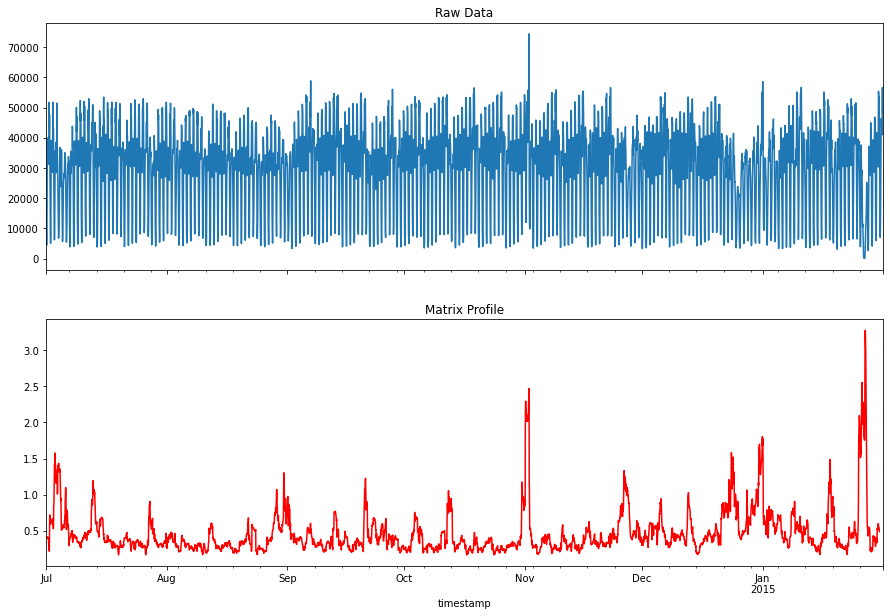

In [6]:
taxi['timestamp'] = pd.to_datetime(taxi['timestamp'])
taxi = taxi.set_index('timestamp').sort_index()
taxi = taxi.resample('1H').sum()

a = taxi.values.squeeze()

m = 24
profile = matrixProfile.stomp(a,m)

taxi['profile'] = np.append(profile[0],np.zeros(m-1)+np.nan)
taxi['profile_index'] = np.append(profile[1], np.zeros(m - 1) + np.nan)

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(15,10))
taxi['value'].plot(ax=ax1, title='Raw Data')

#Plot the Matrix Profile
taxi['profile'].plot(ax=ax2, c='r', title='Matrix Profile')

plt.savefig('fig01.jpg')

### Figure 2

This figure visualizes one column from the Asset Prices Data dataset found by the team as well as its matrix profile, which is used to indicate areas of possible patterns and/or anomalies. This figure, as opposed to figure 1, also included red dots for the points that were classified as anomalies using MatrixProfile-ts.

The figure is also used near the start of our report to visualizes the classified anomalies on the same figure as the raw data and matrix profile. This figure was created during exploratory analysis of the high dimensional dataset when attempting to apply principal component analysis (PCA) to the MatrixProfile-ts implementation.

The team would later run into issues getting PCA and MatrixProfile-ts to work together, but the figure is a good example for visualizing the data, matrix profile, and anomalies in a single figure.

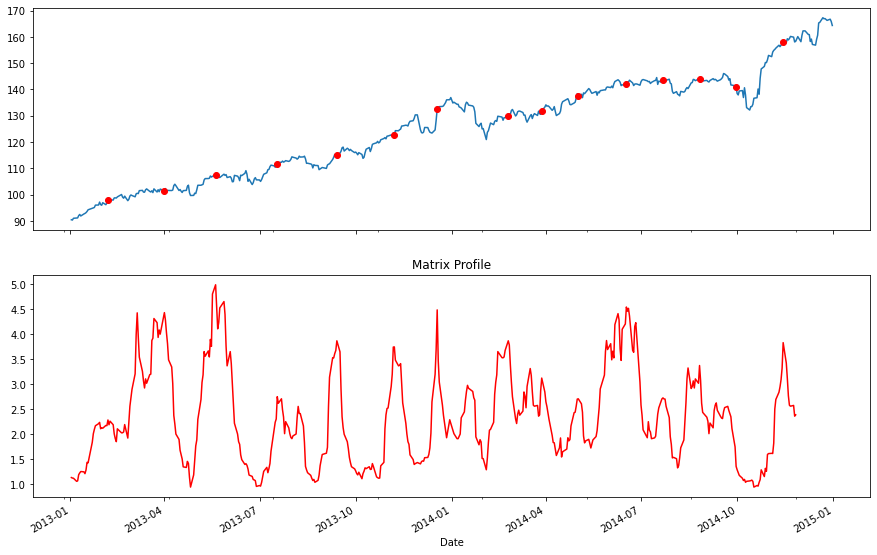

In [7]:
apd['Date'] = pd.to_datetime(apd['Date'])
apd = apd.set_index('Date').sort_index()
temp = pd.DataFrame(apd['MMM'])

a = temp.values.squeeze()

m = 24
profile = matrixProfile.stomp(a,m)

temp['profile'] = np.append(profile[0],np.zeros(m-1)+np.nan)
temp['profile_index'] = np.append(profile[1], np.zeros(m - 1) + np.nan)

ex_zone = 24
anoms = discords(temp['profile'], ex_zone, k=15)

anomalies = temp.iloc[anoms]

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(15,10))
ax1.plot(temp['MMM'])
#.plot(ax=ax1, title='Raw Data')
ax1.plot(anomalies["MMM"], 'ro')

#Plot the Matrix Profile
temp['profile'].plot(ax=ax2, c='r', title='Matrix Profile')

plt.savefig('fig02.jpg')

### Figure 3

In [8]:
Kol=loadmat('Kol_Label.mat')
KE = Kol['KE']
w_raw = Kol['w']
state = Kol['state']

Load in the data and separate each of the attributes.

Below the first "frame" of W is extracted and graphed. Based on previously known data, we also know that the 49th frame is considered to be anomalous. Here we take a look at the two frames side by side. As we can see, the anomalous W frame has a slightly higher amplitude and more stretched shape.

49


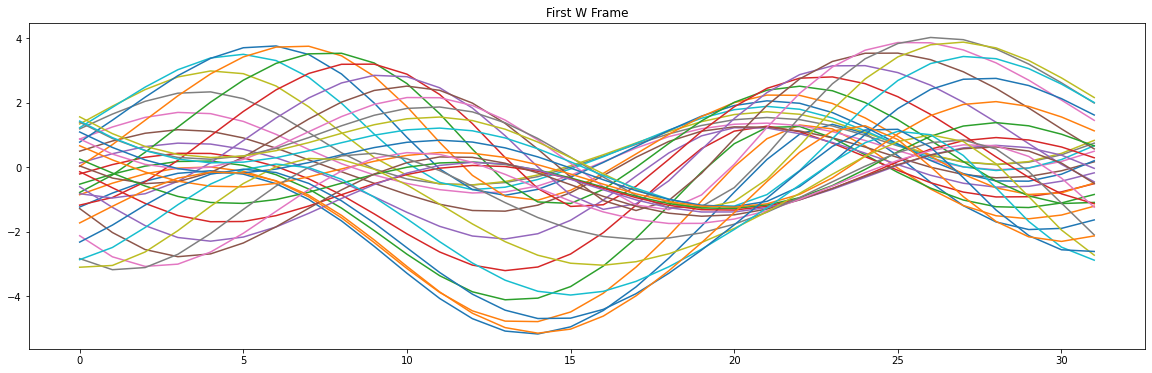

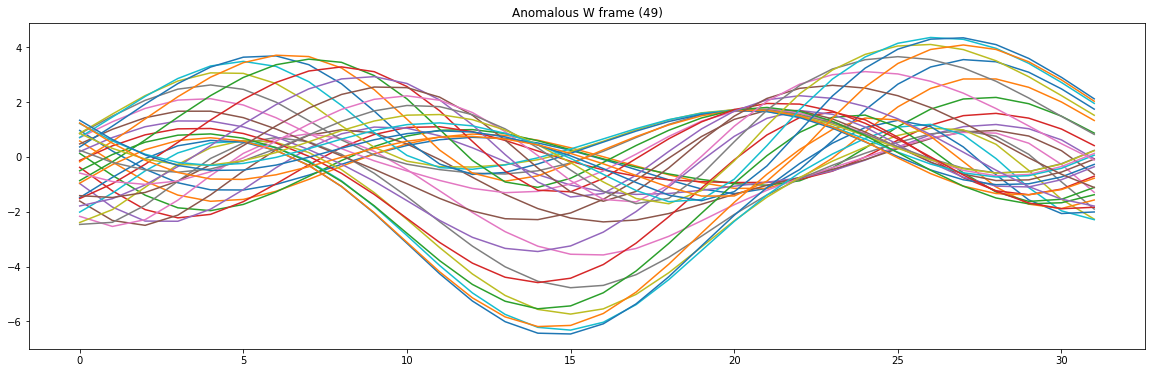

In [9]:
index = list(state[0]).index(1)
print(index)
plt.plot(w_raw[0])
plt.title("First W Frame")
plt.show()
plt.plot(w_raw[49])
plt.title("Anomalous W frame (49)")

plt.savefig('fig03.jpg')

### Figure 4

Below we reshape the W data and the states. We apply a norm to the W data to plot versus the Kinetic energy. This is the sponsor provided visual analysis of the data. It wis determined visually at first as to what the anomalous states would be, KE being over 60. This leads to the manual identification of anomalous class.

(300, 1024)


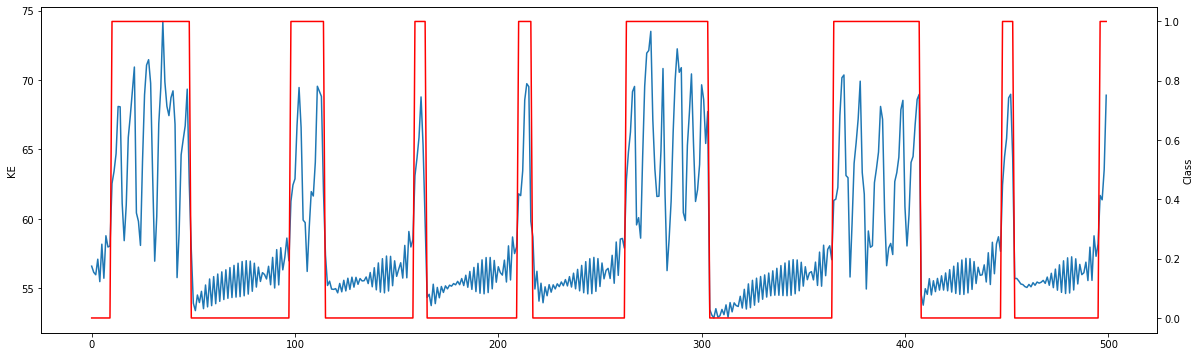

In [10]:
state=Kol['state'].squeeze()
state=state[1:]
[M,N1,N2]=w_raw.shape
w=w_raw.reshape(M,-1)
w=w[1:]
w_test = w[0:300,]
print(w_test.shape)
fix,ax=plt.subplots()
ax.plot(np.linalg.norm(w[500:1000,:],axis=1))
ax.set_ylabel('KE')
ax2=ax.twinx()
ax2.plot(state[500:1000],'r-')
ax2.set_ylabel('Class')

plt.savefig('fig04.jpg')

### Figure 5

Next we will use a One Class Support Vector Machine classifier to attempt to classify the data as anomalous. Only the W frame data will be used in the classifier. Kinetic energy can be used to plot the data and analyze. The above graph shows this plot of each W frame and its corresponding Kinetic energy in blue, with red dots showing W frames being classified as anomalous. 

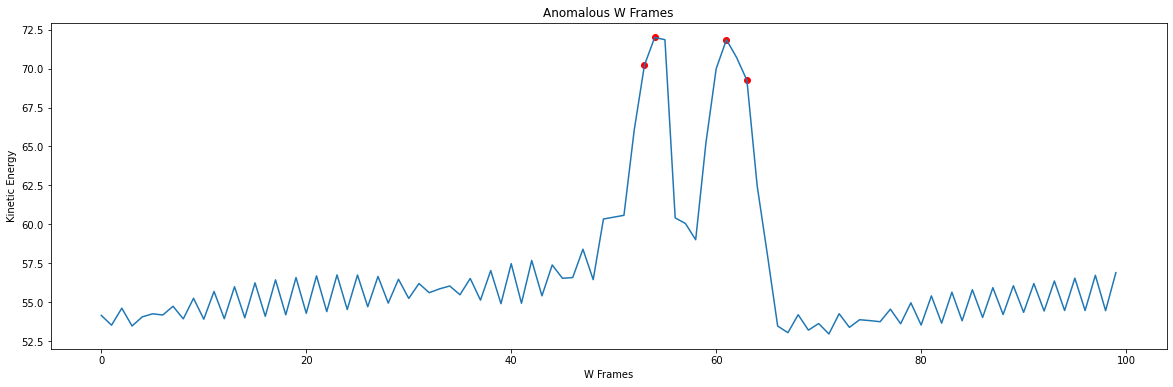

In [11]:
model = svm.OneClassSVM(kernel = 'rbf', nu=0.05).fit(w_test)
y_pred = model.predict(w_test)

y_pred[49]
good = y_pred[y_pred==1]
bad = y_pred[y_pred==-1]
indexes = []
KE_vals = []
for i in range(0, 100):
    if y_pred[i] == -1:
        indexes.append(i)
        KE_vals.append(Kol['KE'][0][i])
KE[0]
plt.plot(KE[0][0:100])
plt.scatter(indexes, KE_vals, color="Red")
plt.xlabel("W Frames")
plt.ylabel("Kinetic Energy")
plt.title("Anomalous W Frames")

plt.savefig('fig05.jpg')